In [ ]:
# package to install
%pip install -q torch transformers diffusers accelerate

## Check Device

In [8]:
import torch
import platform	# to get the platform information

# check if the GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# if OS is Mac, and GPU is also not available, then use mps
if platform.system() == 'Darwin' and torch.cuda.is_available() == False:
    device = torch.device("mps")

print(f"Device: {device}")
    

Device: cuda


## Load Pretrained Model

- We will load the pretrained model from the `transformers` library.
- You can find the list of available models [here](https://huggingface.co/models).

In [9]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16)
pipeline.to(device)  # if you have a GPU, you can use "cuda" to run on the GPU

pipeline.enable_attention_slicing()  # enable attention slicing

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


## Inference by prompting

In [19]:
# the return images length is 1, so we get the first image
image = pipeline("A real Asian with pimples").images[0]

100%|██████████| 50/50 [00:16<00:00,  2.97it/s]


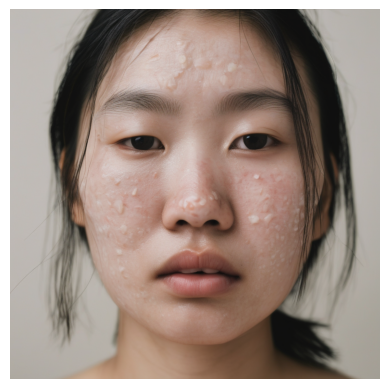

In [21]:
# display the image
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()